### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [5]:
pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB ? eta 0:00:00 0:00:01m0:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 88.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1
    Uninstalling torchvision-0.13.1:
      Successfully uninstalled torchvision-0.13.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.1
    Uninstalling torchaudio-0.12.1:
      Successfully uninstalled torchaudio-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torc

In [6]:
pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch  
import pickle
import torchvision
import torchvision.transforms as transforms
from NDCC import NDCC
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
import torchvision.models as models
import torch.nn as nn
import io
import numpy as np
from functionn import *
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd


In [13]:
#Customer Input Parameters
input_data_size = 3534
num_training_epoch = 50
train_batch_size = 32
learning_rate = 0.01


In [14]:
# loads the main dataset to run the algorithm
D_noisy = torch.load('D_train_noisy.pth')
print("Structure of D_noisy:", type(D_noisy))
print("Length of D_noisy:", len(D_noisy))

if isinstance(D_noisy, tuple) and len(D_noisy) == 2:
    features_tensor, labels_tensor = D_noisy
    print("Features shape:", features_tensor.shape)
    print("Labels shape:", labels_tensor.shape)
else:
    print("Unexpected data structure. Please check the dataset.")

if 'features_tensor' in locals() and 'labels_tensor' in locals():
    for i in range(3):  
        data = features_tensor[i]
        label = labels_tensor[i]
        print("Data:", data, "Label:", label)

Structure of D_noisy: <class 'torch.utils.data.dataset.TensorDataset'>
Length of D_noisy: 3534
Unexpected data structure. Please check the dataset.


In [17]:
#Loads the pretrained model to initialize the main model f
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes=2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
input_size = 70  
model = Net(input_size=input_size, hidden_size=64, num_classes=2)
model.load_state_dict(torch.load('FeedForward_Enhanced.pth'))
myDevice = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model = model.to(myDevice)
print(model)

Net(
  (fc1): Linear(in_features=70, out_features=64, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)


In [18]:
ns_ndcfc = NDCC(input_data_size, train_batch_size, model, myDevice, D_noisy, learning_rate)

In [19]:
data_sample=ns_ndcfc.train_ns_prepare(num_training_epoch, dataset_name)

len lc_list 1100
len ln_list 1100
len l_diff 1100
index of clean data with the least ldiff value 948
min_lost_pre tensor([-2.8827], grad_fn=<SubBackward0>)


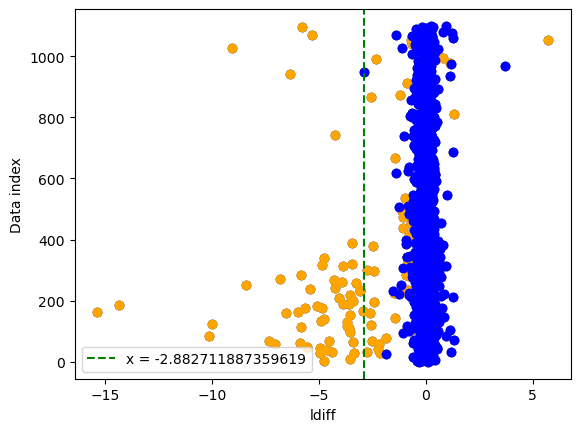

Initial threshold is: 3.818917989730835


  0%|          | 0/50 [00:00<?, ?it/s]

Finish training noise detection model
Execution time for noise detection: 1.3802368640899658 seconds
Execution time for counterfactual part: 2.9432876110076904 seconds
The number of changed labels by counterfactual is 24


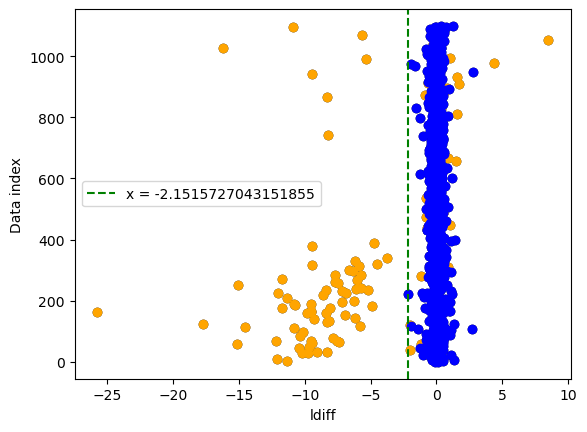

  2%|▏         | 1/50 [03:12<2:36:58, 192.21s/it]

new threshold is tensor([7.2809], grad_fn=<DivBackward0>)
Finish training noise detection model
Execution time for noise detection: 3.188323497772217 seconds
Execution time for counterfactual part: 0.7868282794952393 seconds
The number of changed labels by counterfactual is 1


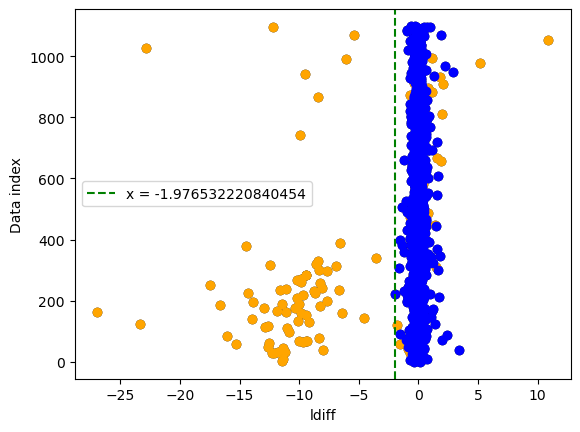

  4%|▍         | 2/50 [06:17<2:30:36, 188.26s/it]

new threshold is tensor([8.5638], grad_fn=<DivBackward0>)
Finish training noise detection model
Execution time for noise detection: 3.0166683197021484 seconds


  4%|▍         | 2/50 [06:21<2:32:46, 190.96s/it]

Execution time for counterfactual part: 1.1337840557098389 seconds
The number of changed labels by counterfactual is 0


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [20]:
# Runs the algorithm
cf_label, y_train_ns_next= ns_ndcfc.training(50)